# TOPICS
- Data Cleaning
    - Correcting data types
    - Removing duplicates
    - Missing value treatment
    - Outlier Treatment
- Data Transformation



### Data Dictionary:
- Income: The annual income of Car owners in Dollars as the data shared is of US manufacturing company
- Marital Status: The car owner is married or not
- Sex: The car owner is male or female
- Education: QUalification of car owner
- Job: What type of job the car owners do
- Use: what is the purpose or use of buying the car
- Miles Clocked: how much does the car has traveled
- Car type: What type of car the car owner's have
- Car Age: How old is the car
- City: Where does the car owner's live
- Region: In which region does the car owner belongs to

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [3]:
df=pd.read_excel('13. EDA_Cars_Data.xlsx')

# Basic Data Exploration

In [4]:
df.head(8)

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,?,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5,Texas,42420.0
6,7,87460.05269,No,M,High School,Manager,45.000488,NaN,15420.0,Minivan,1,Texas,42420.0
7,8,NaN,Yes,F,?,Blue Collar,15.665947,NaN,11290.0,Sports Car,1,Texas,NaN


## Observations:
* There are null values in data set
* 'Car age" might be having wrong entries like "?"

In [5]:
df.shape

(303, 13)

#### Observations:
* The number of columns in our dataset is 13
* The number of rows in our dataset is 303

In [6]:
df['EDUCATION'].unique()

array(['Bachelors', 'High School', nan, '?', 'Masters', 'PhD'],
      dtype=object)

In [7]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
High School,160
Bachelors,54
Masters,38
PhD,6
?,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    object 
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 30.9+ KB


In [9]:
df.dtypes

,0
INDEX,int64
INCOME,float64
MARITAL STATUS,object
SEX,object
EDUCATION,object
JOB,object
TRAVEL TIME,float64
USE,object
MILES CLOCKED,float64
CAR TYPE,object


### Observations:
* Features are having null values
* The data type of 'Car age" should be integer but it is appearing as object, so we need to check that.
* Data type of Postal code

In [10]:
df[df['INCOME']==0]['JOB']

,JOB
23,Home Maker
24,Student
34,NaN
40,Home Maker
66,Student
94,Home Maker
95,Home Maker
103,Student
125,Home Maker
140,Student


In [11]:
df.groupby('CITY')[['TRAVEL TIME','MILES CLOCKED']].sum().sort_values(by='MILES CLOCKED')

,TRAVEL TIME,MILES CLOCKED
CITY,,
Philadelphia,13.662860,15090.0
New Albany,571.666372,198690.0
Texas,585.954173,250430.0
New York City,718.631446,312240.0
Los Angeles,1108.300391,316040.0
Columbia,699.227461,320980.0
Houston,824.297651,412110.0
San Francisco,750.613961,418570.0
Washington,985.730180,447300.0


In [12]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,?,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10,Texas,42420.0


In [13]:
df['CITY'].value_counts()

,count
CITY,
Houston,39
Las Vegas,39
Seattle,36
Los Angeles,33
Washington,32
Columbia,28
San Francisco,27
New York City,23
Texas,22


In [14]:
df.describe()

,INDEX,INCOME,TRAVEL TIME,MILES CLOCKED,POSTAL CODE
count,303.000000,260.000000,262.000000,278.000000,300.000000
mean,139.640264,50025.162170,34.282098,13591.978417,50712.196667
std,85.178422,41186.807914,14.910178,7167.328655,24141.029290
min,1.000000,0.000000,5.000000,1500.000000,11435.000000
25%,62.500000,20452.885023,24.449874,7900.000000,42420.000000
50%,138.000000,44571.590870,33.564757,12065.000000,47150.000000
75%,213.500000,66485.761387,43.907339,18240.000000,61701.000000
max,289.000000,204667.589700,83.617643,38000.000000,90049.000000


### Observations:
* The minimum value of "INCOME" is 0. We need to check the validity of data with people having zero income and having vehicles.

In [15]:
df[df['INCOME']==0]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
23,24,0.0,Yes,F,High School,Home Maker,24.520001,Private,11740.0,SUV,1,Texas,42420.0
24,25,0.0,NaN,M,High School,Student,13.662860,Commercial,15090.0,Minivan,5,Philadelphia,84057.0
34,35,0.0,No,M,High School,NaN,46.932840,Commercial,5700.0,Pickup,1,Los Angeles,90049.0
40,41,0.0,No,M,High School,Home Maker,36.220252,NaN,16510.0,Minivan,1,Los Angeles,90049.0
66,67,0.0,No,M,High School,Student,32.525872,Private,NaN,Pickup,1,New York City,12180.0
94,81,0.0,No,F,High School,Home Maker,40.956033,Private,14240.0,SUV,1,New York City,12180.0
95,82,0.0,Yes,F,NaN,Home Maker,10.700788,Private,8560.0,Sports Car,14,New York City,12180.0
103,90,0.0,No,F,High School,Student,18.462764,NaN,1500.0,SUV,1,San Francisco,55106.0
125,112,0.0,Yes,F,NaN,Home Maker,12.025304,NaN,6500.0,Sports Car,NaN,Houston,61701.0
140,127,0.0,Yes,M,High School,Student,35.269037,Commercial,11610.0,Pickup,1,Houston,61701.0


#### Observations:
* All the people with no income are either householders or students. So, the entries appear to be genuine.

# Data Cleaning

## 1- Correcting data types

In [16]:
 # Converting Postel Code into object
df["POSTAL CODE"]= df['POSTAL CODE'].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDEX           303 non-null    int64  
 1   INCOME          260 non-null    float64
 2   MARITAL STATUS  275 non-null    object 
 3   SEX             297 non-null    object 
 4   EDUCATION       259 non-null    object 
 5   JOB             257 non-null    object 
 6   TRAVEL TIME     262 non-null    float64
 7   USE             250 non-null    object 
 8   MILES CLOCKED   278 non-null    float64
 9   CAR TYPE        293 non-null    object 
 10  CAR AGE         283 non-null    object 
 11  CITY            297 non-null    object 
 12  POSTAL CODE     300 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 30.9+ KB


## 2-Duplicate values

In [18]:
# Checking for number of duplicate rows
df.duplicated().sum()

np.int64(13)

In [19]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [20]:
# Now, check for duplicate data
df.duplicated().sum()

np.int64(0)

In [21]:
# Now the number of rows has been reduced by 13
df.shape

(290, 13)

# 3-Invalid values/ Wrong Entries

In [22]:
# Checking unique values in 'CAR AGE'
df['CAR AGE'].unique()

array([7, 1, '?', 11, 10, 5, nan, 6, 13, 4, 15, 3, 8, 14, 20, 16, 17, 12,
       9, 18, 19], dtype=object)

In [23]:
df['CAR AGE'].value_counts()

,count
CAR AGE,
1,97
10,21
8,21
6,19
7,16
11,15
9,12
5,12
4,11


In [24]:
# Getting rows with 'CAR AGE' as "?"
df[df['CAR AGE']=='?']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,?,Texas,42420.0
82,29,64013.81632,Yes,M,High School,Blue Collar,32.717234,Commercial,7900.0,Pickup,?,Los Angeles,90049.0
113,100,NaN,No,F,Masters,NaN,42.376470,Commercial,24410.0,Pickup,?,San Francisco,55106.0


In [25]:
# Replacing "?" with null values
df["CAR AGE"]=df["CAR AGE"].replace('?',np.nan)

<ipython-input-25-6ef2e41c2655>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CAR AGE"]=df["CAR AGE"].replace('?',np.nan)


In [26]:
df['CAR AGE'].unique()

array([ 7.,  1., nan, 11., 10.,  5.,  6., 13.,  4., 15.,  3.,  8., 14.,
       20., 16., 17., 12.,  9., 18., 19.])

In [27]:
df[df['CAR AGE']=='?']

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


# 4-Missing values / Null Values

In [28]:
# to fetch all the rows having atleast one Null value
df[df.isnull().sum(axis=1)>0]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,NaN,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
5,6,NaN,NaN,F,High School,Home Maker,48.360191,NaN,6000.0,SUV,5.0,Texas,42420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,282,52626.24977,No,F,Bachelors,Clerical,NaN,Private,10300.0,Pickup,NaN,Las Vegas,44412.0
297,284,0.00000,No,NaN,High School,Student,15.379303,Private,5800.0,Sports Car,6.0,Las Vegas,44412.0
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,NaN,1.0,Las Vegas,NaN
300,287,NaN,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,NaN,Las Vegas,44412.0


In [29]:
# Check for missing values in columns
df.isnull().sum()

,0
INDEX,0
INCOME,43
MARITAL STATUS,28
SEX,6
EDUCATION,44
JOB,46
TRAVEL TIME,41
USE,53
MILES CLOCKED,25
CAR TYPE,10


In [30]:
# Check for percentage wise missing values in columns
df.isnull().sum()/len(df)*100

,0
INDEX,0.000000
INCOME,14.827586
MARITAL STATUS,9.655172
SEX,2.068966
EDUCATION,15.172414
JOB,15.862069
TRAVEL TIME,14.137931
USE,18.275862
MILES CLOCKED,8.620690
CAR TYPE,3.448276


####  There are various ways of treating your missing values in the data set. And which technique to use differ case to case:

* Drop the missing values
* Impute with mean value :Before replacing with mean value, check that the variable shouldn't have extreme values .i.e. outliers.
* Impute with median value : In case we have extreme values it is advisable to use median approach.
* Impute with mode value : For categorical column, we can replace the missing values with mode values i.e the frequent ones.
    

**First check for the outliers**

In [31]:
Q1= df["INCOME"].quantile(0.25)
Q3= df["INCOME"].quantile(0.75)
IQR=Q3-Q1
lower_fence= Q1- 1.5*IQR
upper_fence= Q3 + 1.5* IQR

In [32]:
Q1, Q3

(np.float64(18591.515659999997), np.float64(69382.95116))

In [33]:
df["INCOME"].median()

40248.26086

In [34]:
df[df["CAR AGE"]> upper_fence]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


In [35]:
df["INCOME"]> upper_fence

,INCOME
0,False
1,False
2,False
3,False
4,False
...,...
298,False
299,False
300,False
301,False


<Figure size 500x300 with 0 Axes>

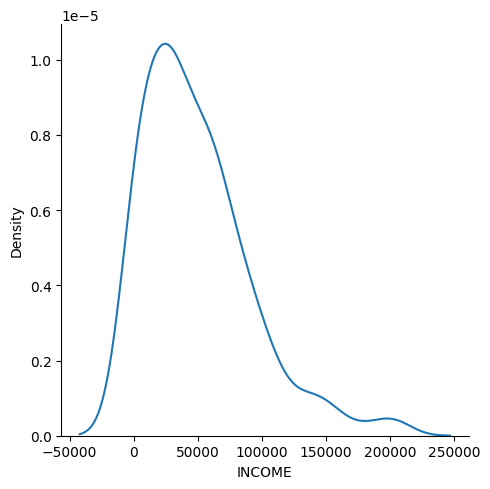

<Figure size 500x300 with 0 Axes>

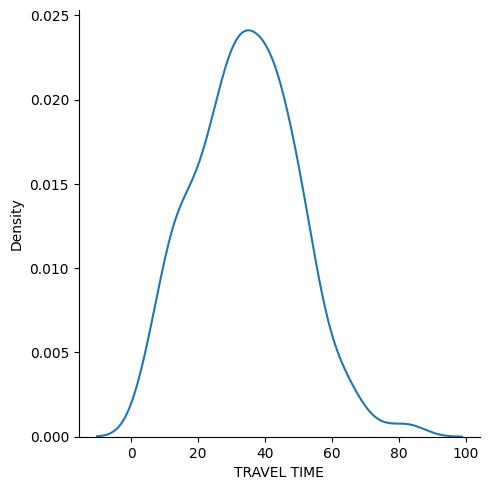

<Figure size 500x300 with 0 Axes>

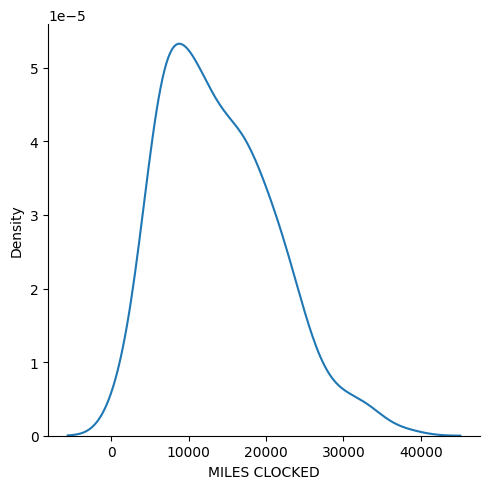

<Figure size 500x300 with 0 Axes>

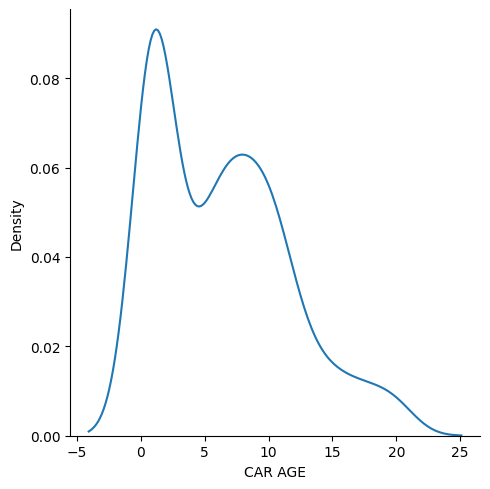

In [36]:
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(5,3))
    sns.displot(data=df,x=i,kind='kde' )
    plt.show()

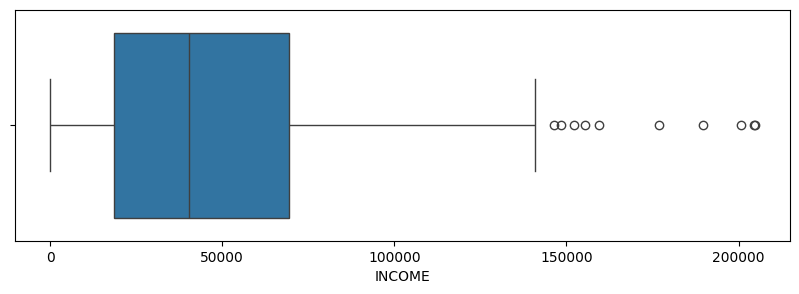

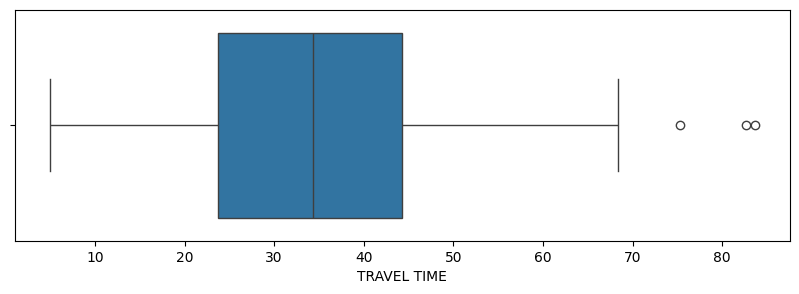

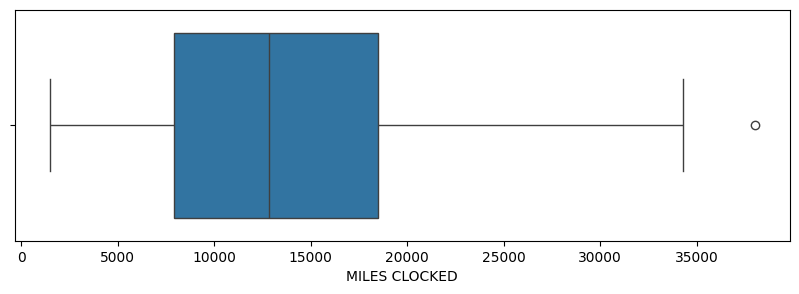

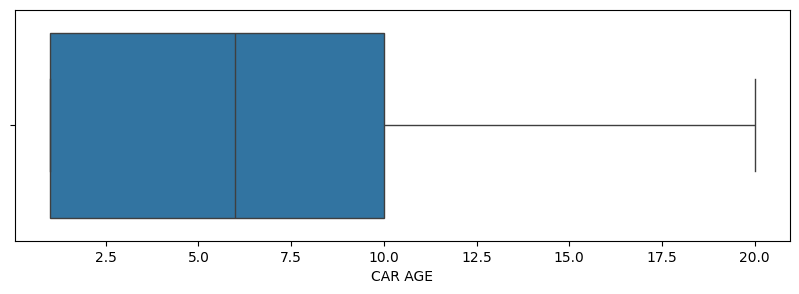

In [37]:
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df,x=i)
    plt.show()

In [38]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
ll,ul=remove_outlier(df['INCOME'])

In [40]:
df[df['INCOME']>ul]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
146,133,146338.4425,No,M,Masters,NaN,21.298756,Commercial,22620.0,Panel Truck,10.0,Houston,61701.0
156,143,200771.9243,NaN,F,PhD,Doctor,NaN,Private,9270.0,SUV,NaN,Houston,61701.0
162,149,204372.9551,Yes,M,NaN,NaN,NaN,Commercial,5100.0,Pickup,20.0,Houston,61701.0
165,152,155409.6551,Yes,M,Bachelors,Manager,40.126603,Commercial,33330.0,Panel Truck,10.0,Seattle,78207.0
179,166,159399.0167,No,F,PhD,Doctor,31.607317,Private,16810.0,Sports Car,1.0,Seattle,78207.0
199,186,176848.9483,Yes,F,Bachelors,Blue Collar,37.103735,Commercial,26470.0,SUV,4.0,Seattle,78207.0
243,230,152059.8036,Yes,F,PhD,Manager,34.468723,Private,33380.0,NaN,NaN,Washington,11435.0
249,236,148442.6402,Yes,F,Masters,Lawyer,40.119420,Private,18500.0,Sports Car,11.0,Washington,11435.0
254,241,204667.5897,Yes,F,Masters,NaN,31.515561,Commercial,21970.0,Van,NaN,NaN,11435.0
267,254,189554.8586,No,M,PhD,Doctor,34.623548,NaN,1500.0,SUV,16.0,Las Vegas,44412.0


In [41]:
df[df['INCOME']<ll]

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE


** Since, Outliers are present so Replacing NULL values in Numerical Columns using Median**

In [42]:
median1=df["INCOME"].median()
median2=df["TRAVEL TIME"].median()
median3=df["MILES CLOCKED"].median()
median4=df["CAR AGE"].median()

df["INCOME"].replace(np.nan,median1,inplace=True)
df["TRAVEL TIME"].replace(np.nan,median2,inplace=True)
df["MILES CLOCKED"].replace(np.nan,median3,inplace=True)
df["CAR AGE"].replace(np.nan,median4,inplace=True)

<ipython-input-42-02d949bf4bb1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["INCOME"].replace(np.nan,median1,inplace=True)
<ipython-input-42-02d949bf4bb1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**Replacing NULL values in Categorical Columns using Mode**

In [43]:
mode1=df["SEX"].mode().values[0]
mode2=df["MARITAL STATUS"].mode().values[0]
mode3=df["EDUCATION"].mode().values[0]
mode4=df["JOB"].mode().values[0]
mode5=df["USE"].mode().values[0]
mode6=df['CITY'].mode().values[0]
mode7=df["CAR TYPE"].mode().values[0]
mode8=df["POSTAL CODE"].mode().values[0]

df["SEX"]=df["SEX"].replace(np.nan,mode1)
df["MARITAL STATUS"]= df["MARITAL STATUS"].replace(np.nan,mode2)
df["EDUCATION"]=df["EDUCATION"].replace(np.nan,mode3)
df["JOB"]=df["JOB"].replace(np.nan,mode4)
df["USE"]=df["USE"].replace(np.nan,mode5)
df["CAR TYPE"]=df["CAR TYPE"].replace(np.nan,mode7)
df['CITY']=df['CITY'].replace(np.nan,mode6)
df['POSTAL CODE']=df['POSTAL CODE'].replace(np.nan,mode8)

<ipython-input-43-bdb8b22ec72f>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['POSTAL CODE']=df['POSTAL CODE'].replace(np.nan,mode8)


In [44]:
# Check for missing value in any column
df.isnull().sum()

,0
INDEX,0
INCOME,0
MARITAL STATUS,0
SEX,0
EDUCATION,0
JOB,0
TRAVEL TIME,0
USE,0
MILES CLOCKED,0
CAR TYPE,0


# 5- Outlier Treatment

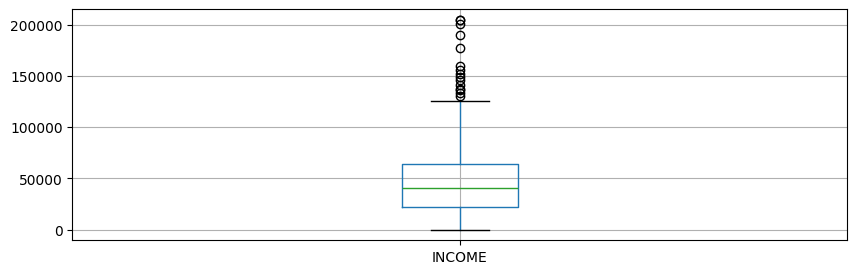

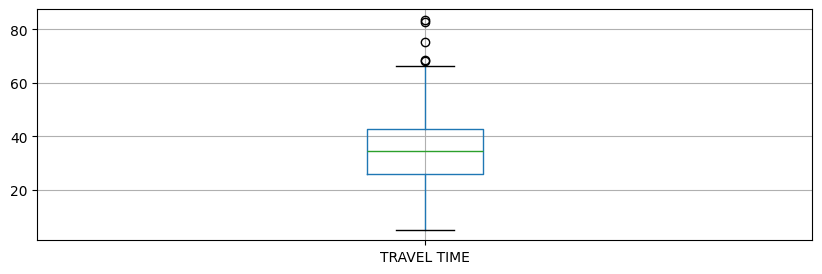

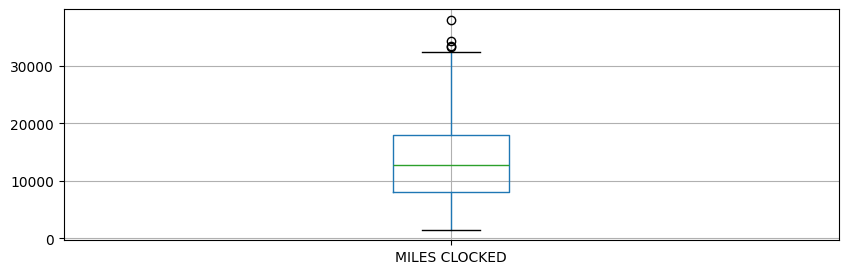

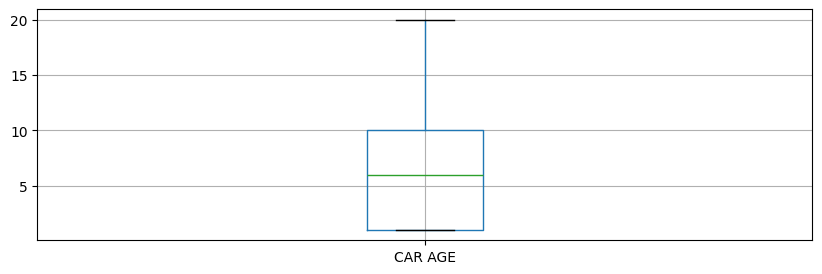

In [45]:
# Checking Outliers
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    df.boxplot(column=i)
    plt.show()

#### Looking at the box plot, it seems that the three variables INCOME, MILES CLOCKED and TRAVEL TIME have outlier present in the variables.
- There are several ways of treating them:
    - 1- Check if outliers are genuine values.
    - 2- If not, Drop the outlier value.
    - 3- OR Replace the outlier values using the IQR Or Percentiles

**Creating a user definded function for finding the lower and upper range for a variable so that outlier can be treated.**

In [46]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])

In [47]:
# Replacing outliers with lower and upper ranges
lrincome,urincome=remove_outlier(df['INCOME'])
df['INCOME']=np.where(df['INCOME']>urincome,urincome,df['INCOME'])
df['INCOME']=np.where(df['INCOME']<lrincome,lrincome,df['INCOME'])


lrtravel,urtravel=remove_outlier(df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']>urtravel,urtravel,df['TRAVEL TIME'])
df['TRAVEL TIME']=np.where(df['TRAVEL TIME']<lrtravel,lrtravel,df['TRAVEL TIME'])

lrmiles,urmiles=remove_outlier(df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']>urmiles,urmiles,df['MILES CLOCKED'])
df['MILES CLOCKED']=np.where(df['MILES CLOCKED']<lrmiles,lrmiles,df['MILES CLOCKED'])


### Boxplots after Outlier Treatment

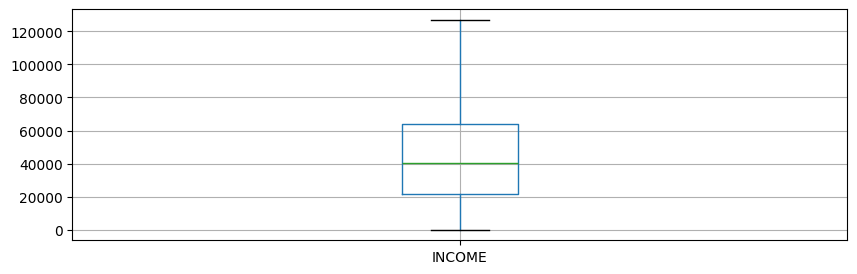

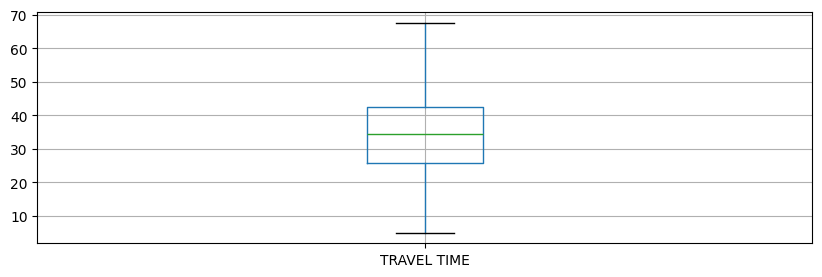

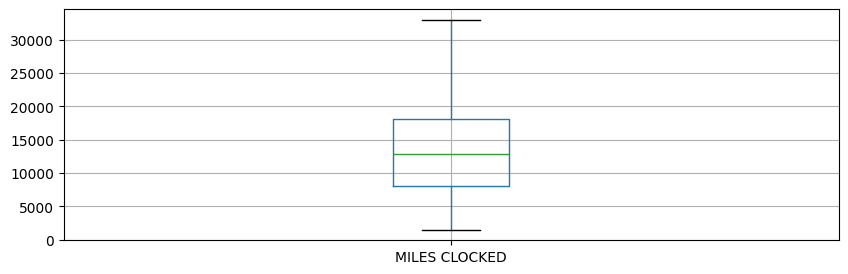

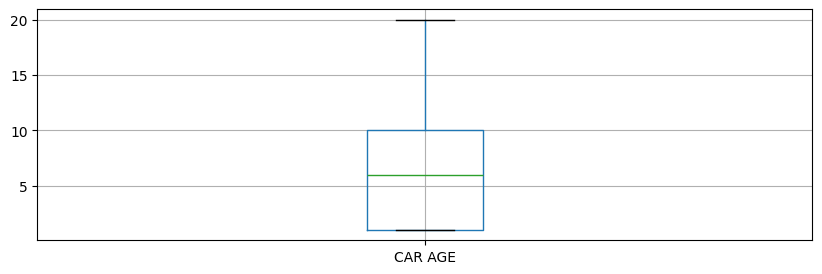

In [48]:
for i in ["INCOME","TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    df.boxplot(column=i)
    plt.show()

**If you look at the box plots above,post treating the outlier there are no outliers in all these columns.**

# Data Transformation

In [49]:
from scipy import stats

In [50]:
df.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1.0,125301.242500,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2.0,50815.445310,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3.0,62977.824160,No,F,Bachelors,Clerical,33.639949,Private,12840.0,SUV,6.0,Texas,42420.0
3,4.0,77099.966240,No,F,High School,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas,42420.0
4,5.0,126956.029537,No,M,High School,Blue Collar,34.384168,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


### 1-Normalization
* Feature Normalization is the method used to change the shape of features of data.

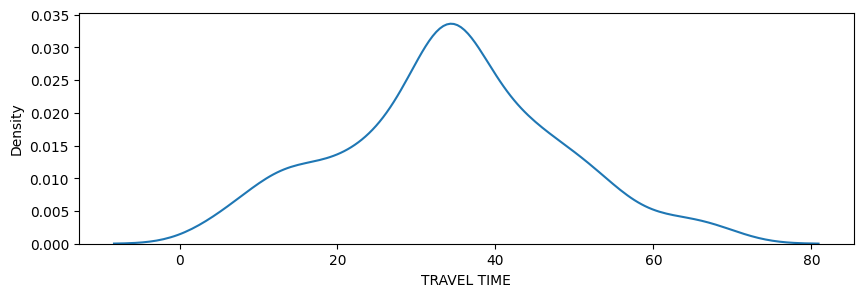

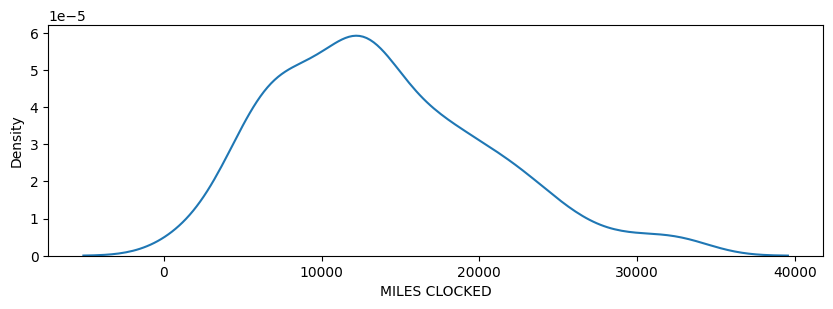

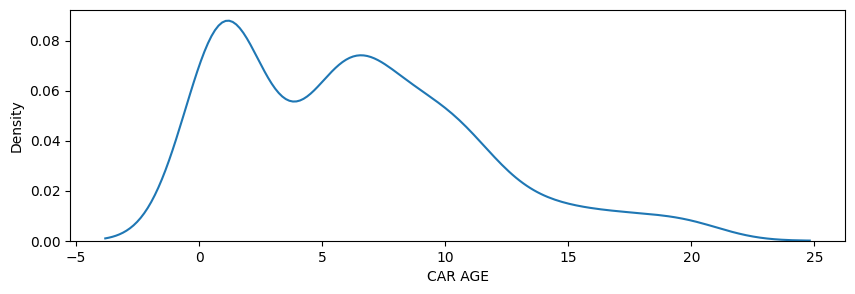

In [51]:
for i in ["TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df[i])
    plt.show()

In [52]:
df_normalize=df.copy()
df_normalize['TRAVEL TIME']=stats.boxcox(df_normalize['TRAVEL TIME'])[0]
df_normalize['CAR AGE'] = stats.boxcox(df_normalize['CAR AGE'])[0]
df_normalize['MILES CLOCKED']= stats.boxcox(df_normalize['MILES CLOCKED'])[0]

In [53]:
df_normalize['CAR AGE'].describe()

,CAR AGE
count,290.000000
mean,1.918053
std,1.505015
min,0.000000
25%,0.000000
50%,2.316262
75%,3.214509
max,4.654052


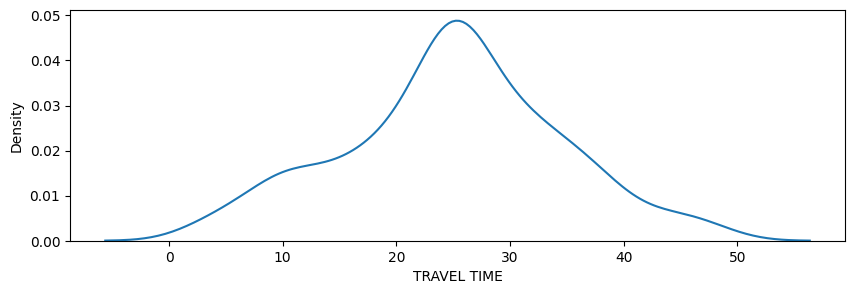

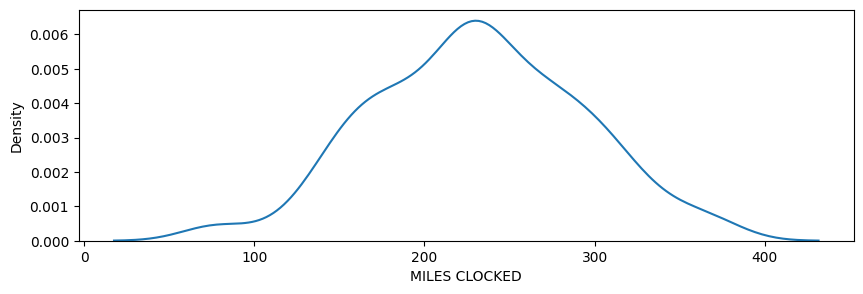

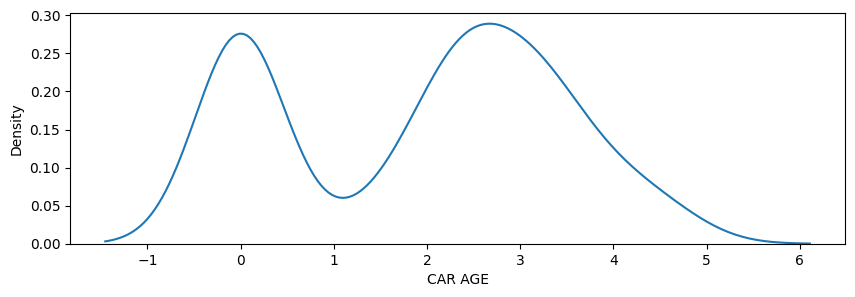

In [54]:
for i in ["TRAVEL TIME","MILES CLOCKED","CAR AGE"]:
    plt.figure(figsize=(10,3))
    sns.kdeplot(df_normalize[i])
    plt.show()

### 2-Scaling
* Scaling is the method used to change the range of features of data.
* If the data in variables are of different scales, it is tough to compare these variables.
* Z-Score or Standard Score.
* Min-Max Scaling


In [55]:
df['INCOME'].describe().round(4)

,INCOME
count,290.0000
mean,46183.3463
std,33803.2525
min,0.0000
25%,21923.6432
50%,40248.2609
75%,63936.5978
max,126956.0295


In [57]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [58]:
df_scaled=df.copy()
df_scaled['INCOME'] = std_scale.fit_transform(df_scaled[['INCOME']])
#df_scaled['TRAVEL TIME'] = std_scale.fit_transform(df_scaled[['TRAVEL TIME']])
#df_scaled['CAR AGE'] = std_scale.fit_transform(df_scaled[['CAR AGE']])
#df_scaled['MILES CLOCKED']= std_scale.fit_transform(df_scaled[['MILES CLOCKED']])

In [59]:
df_scaled['INCOME'].describe()

,INCOME
count,2.900000e+02
mean,1.914178e-18
std,1.001729e+00
min,-1.368601e+00
25%,-7.189142e-01
50%,-1.758809e-01
75%,5.261014e-01
max,2.393625e+00


<Axes: xlabel='INCOME', ylabel='Density'>

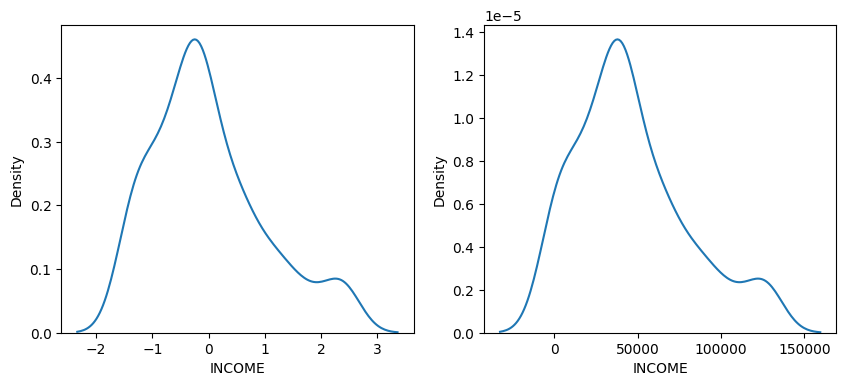

In [60]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(df_scaled['INCOME'])

plt.subplot(1,2,2)
sns.kdeplot(df['INCOME'])


In [61]:
df_scaled['INCOME'].describe().round(4)

,INCOME
count,290.0000
mean,0.0000
std,1.0017
min,-1.3686
25%,-0.7189
50%,-0.1759
75%,0.5261
max,2.3936


**INCOME, TRAVEL TIME and CAR AGE, to one scale now.**

# *******************************************************************